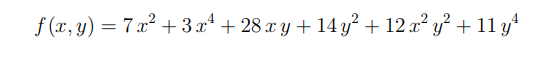

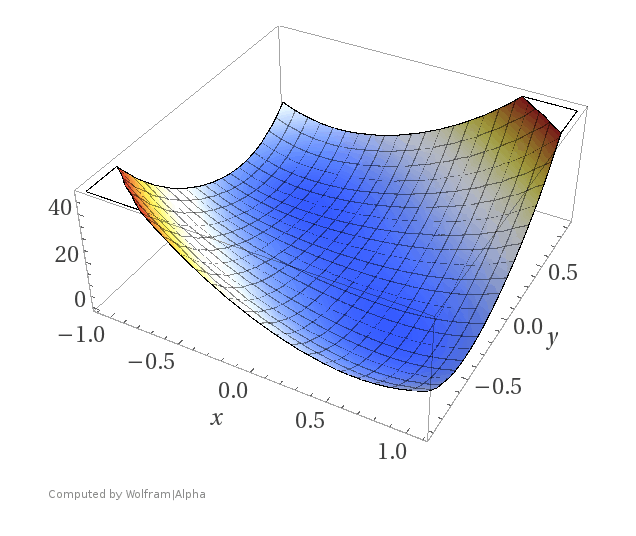

In [1]:
from math import sqrt

def f(x, y):
    return 7 * x ** 2 + 3 * x ** 4 + 28 * x * y + 14 * y ** 2 + 12 *x ** 2 * y ** 2 + 11 * y ** 4

def grad(x, y):
    return (2 * (6 * x ** 3 + x * (12 * y ** 2 + 7) + 14 * y), 4 * (6 * x ** 2 * y + 7 * x + 11 * y ** 3 + 7 * y))

In [2]:
def dichotomy_method(f, a, b, delta, eps):
    start = a
    fin = b
    it_count = 0
    while (fin - start) / 2.0 > eps:
        c = (start + fin - delta) / 2.0
        d = (start + fin + delta) / 2.0
        if f(c) <= f(d):
            fin = d
        else:
            start = c
        it_count += 1
    return (start + fin) / 2.0, it_count, it_count * 2

In [3]:
EPS = 10 ** (-6)

f_y = lambda x: lambda y: f(x, y)
f_x = lambda y: lambda x: f(x, y)

In [4]:
def diff(x1, y1, x2, y2):
    return sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def coordinate_descent(A_x, B_x, A_y, B_y, eps):
    delta = eps / 2.0
    x = A_x + B_x / 2
    y = A_y + B_y / 2
    while True:
        y_upd = dichotomy_method(f_y(x), A_y, B_y, delta, eps / 2)[0]
        x_upd = dichotomy_method(f_x(y_upd), A_x, B_x, delta, eps / 2)[0]
        if diff(x, y, x_upd, y_upd) <= eps:
            break
        x = x_upd
        y = y_upd
    return f(x_upd, y_upd), x_upd, y_upd

In [5]:
print(coordinate_descent(-1.0, 1.0, -40.0, 40.0, EPS))

(-0.71559088557573, -0.49524461762863403, 0.3523941316037653)


In [6]:
def grad_descent(x, y, eps):
    while True:
        x_grad = grad(x, y)
        alpha = dichotomy_method(lambda alpha: f(x - alpha * x_grad[0],
                                          y - alpha * x_grad[1]),
                                 0, 0.1, eps / 2, eps)
        new_x, new_y = x - alpha[0] * x_grad[0], y - alpha[0] * x_grad[1]
        if sqrt((x - new_x) ** 2 + (y - new_y) ** 2) < eps:
            return (f(new_x, new_y), new_x, new_y)
        x, y = new_x, new_y

In [9]:
print(grad_descent(-1, -1, EPS))

(-0.715590885572839, -0.4952441638209164, 0.35239424414677983)
